<a href="https://colab.research.google.com/github/Sankytanky100/Data_Science-Projects/blob/main/Effect_of_Emergency_Weather_Systems_on_Transit_Times_Using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Evaluating the Impact of Cover Crops on Farm Yield Using Propensity Score Weighting and Regression Analysis**

In [1]:
!pip install rpy2


In [2]:
!apt-get install -y r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:
%load_ext rpy2.ipython



In [4]:
%%R
install.packages("cobalt")
library(cobalt)
install.packages("WeightIt")
library(WeightIt)
install.packages("lmtest")
library(lmtest)
install.packages("sandwich")
library(sandwich)
install.packages("rddtools", dependencies = TRUE)
library(rddtools)
install.packages("dplyr")
library(dplyr)
install.packages("ggplot2")
library(ggplot2)
install.packages("rdd")
library(rdd)

(as ‘lib’ is unspecified)



















	‘/tmp/Rtmpj9lw70/downloaded_packages’


(as ‘lib’ is unspecified)







	‘/tmp/Rtmpj9lw70/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/Rtmpj9lw70/downloaded_packages’


Attaching package: ‘zoo’



    as.Date, as.Date.numeric


(as ‘lib’ is unspecified)







	‘/tmp/Rtmpj9lw70/downloaded_packages’

(as ‘lib’ is unspecified)

































































































































	‘/tmp/Rtmpj9lw70/downloaded_packages’






[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]

Please consider citing R and rddtools,
citation()
citation("rddtools")


(as ‘lib’ is unspecified)







	‘/tmp/Rtmpj9lw70/downloaded_packages’

Attaching package: ‘dplyr’



    recode



    filter, lag



    intersect, setdi

In [5]:
from google.colab import files
uploaded = files.upload()


Saving snow.csv to snow.csv


In [6]:
%%R

# Load ggplot2 library
library(ggplot2)

# Import dataset
snow_df <- read.csv("snow.csv")

head(snow_df)


       date snowfall    emergency  minutes
1 11/1/2017 2.218687 No Emergency 63.13641
2 11/2/2017 4.519099    Emergency 45.51861
3 11/3/2017 5.124571    Emergency 41.83613
4 11/4/2017 1.301896 No Emergency 51.25552
5 11/5/2017 5.314226    Emergency 37.57589
6 11/6/2017 1.636324 No Emergency 43.83927


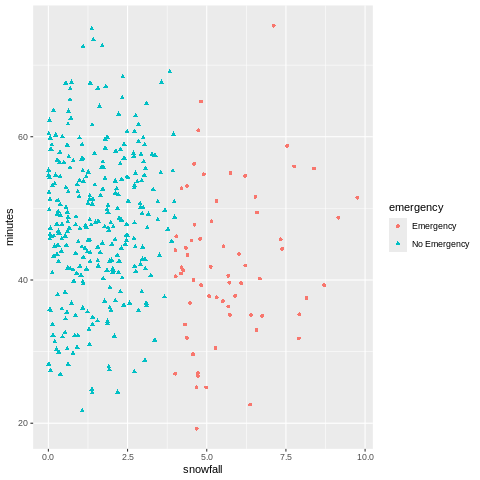

In [7]:
%%R
# Create base plot
scatter_base <- ggplot(
  data = snow_df,
  aes(
    x = snowfall, # forcing variable
    y = minutes,  # outcome variable
    color = emergency,
    shape = emergency
  )
) +
  geom_point() # Add points

# Print plot
scatter_base


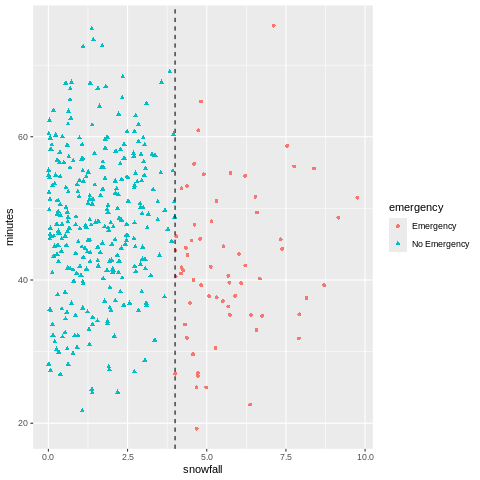

In [8]:
%%R
# Update base plot with line at cutpoint
scatter_cutpoint <-
  scatter_base + # original plot
  geom_vline(
    xintercept = 4, # vertical line at cutpoint
    linetype = "dashed"
  )

# Print plot
scatter_cutpoint

`geom_smooth()` using formula = 'y ~ x'


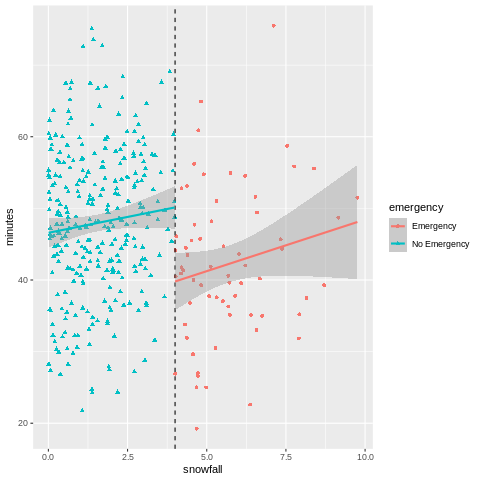

In [9]:
%%R
# Add linear best fit lines for each group
scatter_lines <- scatter_cutpoint +
  geom_smooth(aes(group = emergency), method = "lm")

# Print plot
scatter_lines

In [10]:
%%R
# Calculate bandwidth
snow_ik_bw <- IKbandwidth(
  X = snow_df$snowfall,  # forcing variable
  Y = snow_df$minutes,   # outcome variable
  cutpoint = 4           # cutpoint
)

# Print bandwidth
snow_ik_bw

[1] 2.628204


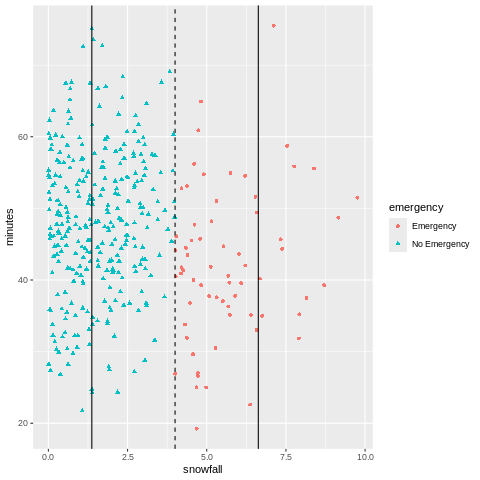

In [11]:
%%R
# Add bandwidth lines to plot
scatter_bw <-
  scatter_cutpoint + # previous plot
  geom_vline(        # add solid lines
    # lines one bandwidth above or below 4
    xintercept = 4 + c(-snow_ik_bw, snow_ik_bw)
  )

# Print plot
scatter_bw

In [12]:
%%R
# Fit local linear regression model
snow_rdd <- RDestimate(
  formula = minutes ~ snowfall,  # outcome model
  cutpoint = 4,                  # cutpoint
  bw = snow_ik_bw,               # bandwidth
  data = snow_df                 # data
)

In [13]:
%%R
# Results of local linear regression model
snow_rdd


Call:
RDestimate(formula = minutes ~ snowfall, data = snow_df, cutpoint = 4, 
    bw = snow_ik_bw)

Coefficients:
     LATE    Half-BW  Double-BW  
   -11.04     -12.34     -10.44  



In [14]:
%%R
# Print the number of observations
snow_rdd$obs


[1] 204  93 360


In [15]:
%%R
# Print the standard errors
snow_rdd$se


[1] 2.974090 3.925439 2.471460
